In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from thinkdsp import Wave, read_wave, TriangleSignal

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

CONST_PI2 = np.pi * 2

def compute_correlation(signal_data, offset=1):
    length = len(signal_data.ys)
    section1 = signal_data.ys[offset:]
    section2 = signal_data.ys[:length-offset]
    corr_value = np.corrcoef(section1, section2)[0, 1]
    return corr_value

def calculate_autocorr(signal_data):
    offsets = np.arange(len(signal_data.ys)//2)
    corr_results = [compute_correlation(signal_data, shift) for shift in offsets]
    return offsets, corr_results

sound_data = read_wave('28042__bcjordan__voicedownbew.wav')
sound_data.normalize()
sound_data.make_audio()

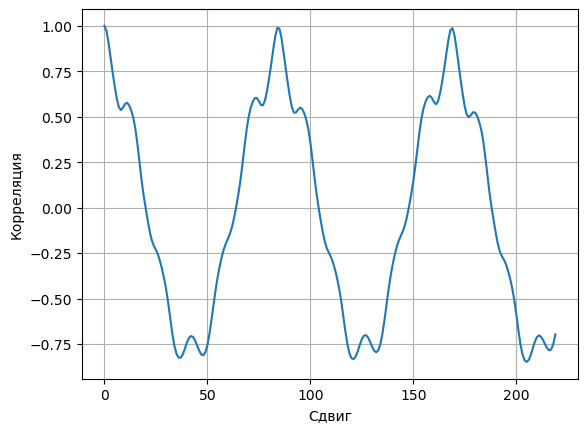

In [2]:
sound_part = sound_data.segment(0, 0.01)
shift_vals, corr_vals = calculate_autocorr(sound_part)
peak_pos = np.array(corr_vals[90:110]).argmax() + 90
plt.plot(shift_vals, corr_vals)
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()

def detect_base_freq(sound_part, freq_low=70, freq_high=150):
    shifts, autocorrs = calculate_autocorr(sound_part)
    peak_offset = np.array(autocorrs[freq_low:freq_high]).argmax() + freq_low
    time_period = peak_offset / sound_part.framerate
    base_freq = 1 / time_period
    return base_freq

sound_track = read_wave('28042__bcjordan__voicedownbew.wav')
sound_track.normalize()
sound_track.make_audio()

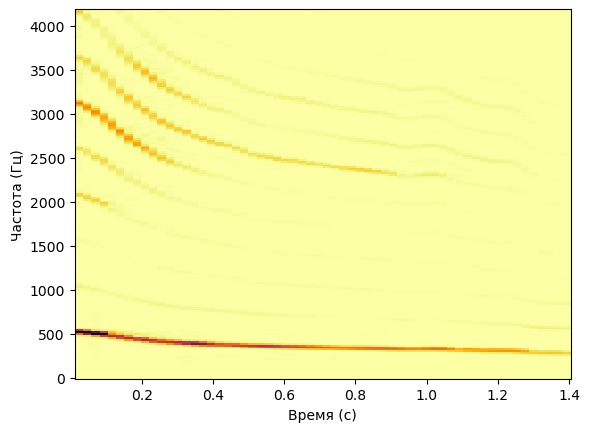

436.63366336633663


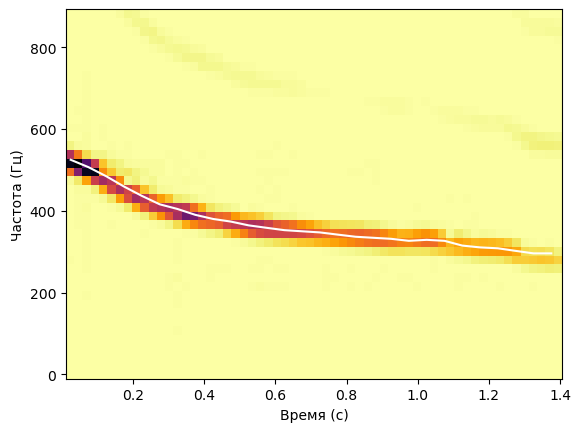

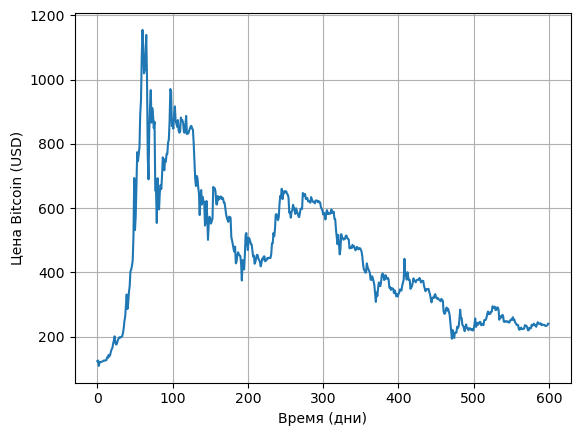

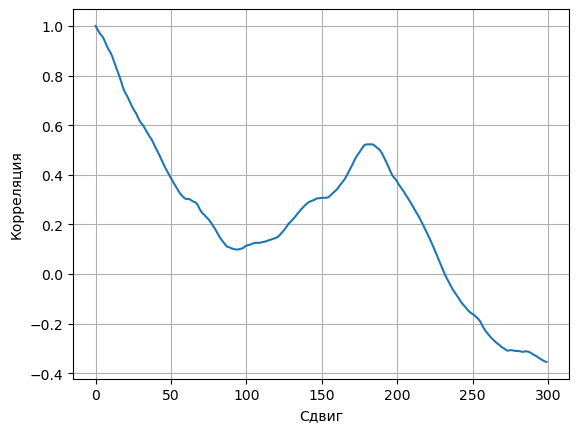

In [3]:
sound_track.make_spectrogram(2048).plot(high=4200)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

sound_part = sound_data.segment(start=0.2, duration=0.01)
main_freq = detect_base_freq(sound_part)
print(main_freq)

time_intervals = np.arange(0.0, 1.4, 0.05)
time_positions = []
freq_values = []
for interval in time_intervals:
    time_positions.append(interval + 0.05/2)
    segment_part = sound_data.segment(start=interval, duration=0.01)
    freq_val = detect_base_freq(segment_part)
    freq_values.append(freq_val)

sound_track.make_spectrogram(2048).plot(high=900)
plt.plot(time_positions, freq_values, color='white')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

bitcoin_data = pd.read_csv('Bitcoin.csv', nrows=600, parse_dates=[0])
price_series = bitcoin_data['Closing Price (USD)']
time_indices = bitcoin_data.index
price_track = Wave(price_series, time_indices, framerate=1)
price_track.plot()
plt.xlabel('Время (дни)')
plt.ylabel('Цена Bitcoin (USD)')
plt.grid(True)
plt.show()

offset_vals, corr_results = calculate_autocorr(price_track)
plt.plot(offset_vals, corr_results)
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()

sax_sound = read_wave('100475__iluppai__saxophone-weep.wav')
sax_sound.normalize()
sax_sound.make_audio()

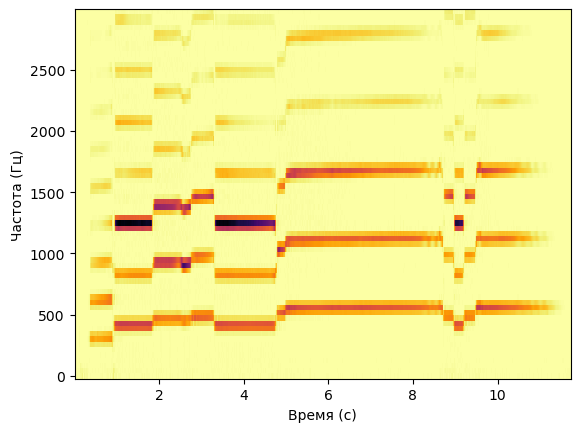

In [4]:
spectro_data = sax_sound.make_spectrogram(seg_length=1024)
spectro_data.plot(high=3000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

start_time = 0.0
segment_length = 1
sax_segment = sax_sound.segment(start=start_time, duration=segment_length)
sax_segment.make_audio()

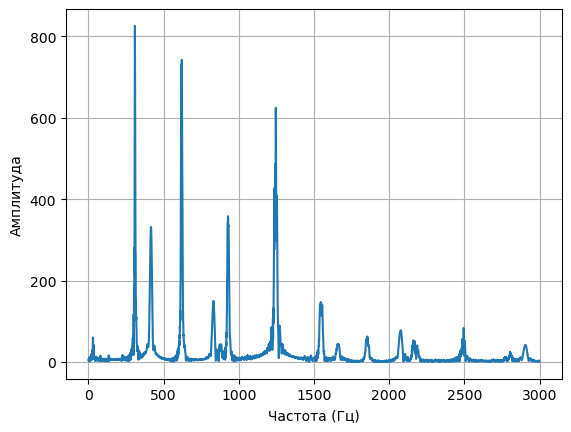

[(825.918193868792, 309.0), (742.4482176019003, 621.0), (731.2050718889759, 617.0), (728.4027415023133, 310.0), (699.869109864398, 620.0), (642.5416605230358, 622.0), (624.5861936417981, 1246.0), (622.1810823090663, 618.0), (611.1547437665349, 623.0), (580.0707322624768, 616.0)]


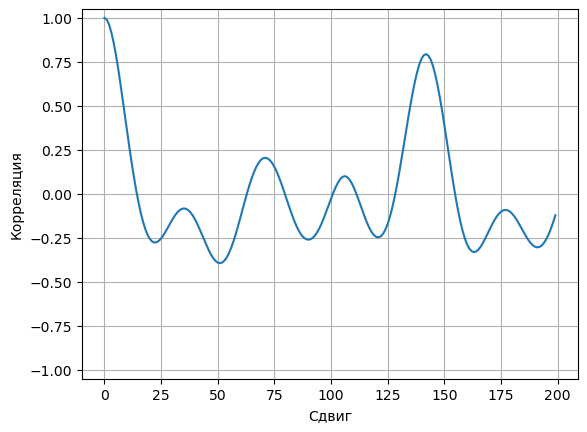

80


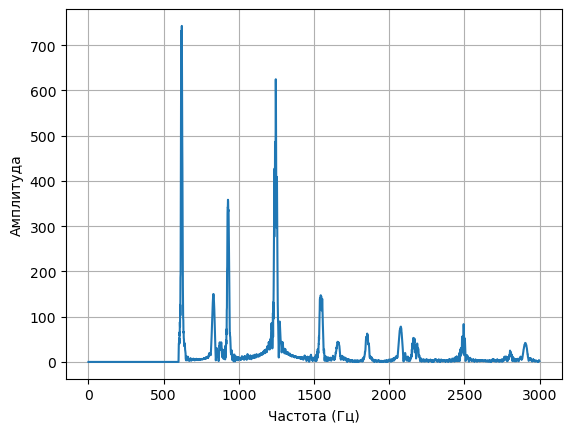

In [5]:
freq_spectrum = sax_segment.make_spectrum()
freq_spectrum.plot(high=3000)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

print(freq_spectrum.peaks()[:10])

def compute_self_corr(segment_data):
    corr_array = np.correlate(segment_data.ys, segment_data.ys, mode='same')
    array_len = len(corr_array)
    length_range = range(array_len, array_len//2, -1)
    corr_half = corr_array[array_len//2:].copy()
    corr_half /= length_range
    corr_half /= corr_half[0]
    return corr_half

corr_data = compute_self_corr(sax_segment)
plt.plot(corr_data[:200])
plt.xlabel('Сдвиг')
plt.ylabel('Корреляция')
plt.ylim([-1.05, 1.05])
plt.grid(True)
plt.show()

def extract_freq(corr_data, range_low, range_high):
    peak_lag = np.array(corr_data[range_low:range_high]).argmax() + range_low
    print(peak_lag)
    time_cycle = peak_lag / sax_segment.framerate
    freq_result = 1 / time_cycle
    return freq_result

extract_freq(corr_data, 80, 100)

filtered_spectrum = sax_segment.make_spectrum()
filtered_spectrum.high_pass(600)
filtered_spectrum.plot(high=3000)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

filtered_segment = filtered_spectrum.make_wave()
filtered_segment.make_audio()